___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright by Pierian Data Inc.</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# CIA Country Analysis and Clustering


Source: All these data sets are made up of data from the US government. 
https://www.cia.gov/library/publications/the-world-factbook/docs/faqs.html

## Goal: 

### Gain insights into similarity between countries and regions of the world by experimenting with different cluster amounts. What do these clusters represent? *Note: There is no 100% right answer, make sure to watch the video for thoughts.*

----

## Imports and Data

**TASK: Run the following cells to import libraries and read in data.**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('CIA_Country_Facts.csv')

## Exploratory Data Analysis

**TASK: Explore the rows and columns of the data as well as the data types of the columns.**

In [6]:
df.head(20)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN
5,Angola,SUB-SAHARAN AFRICA,12127071,1246700,9.7,0.13,0.00,191.19,1900.0,42.0,7.8,2.41,0.24,97.35,NaN,45.11,24.20,0.096,0.658,0.246
6,Anguilla,LATIN AMER. & CARIB,13477,102,132.1,59.80,10.76,21.03,8600.0,95.0,460.0,0.00,0.00,100.00,2.0,14.17,5.34,0.040,0.180,0.780
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,156.0,34.54,-6.15,19.46,11000.0,89.0,549.9,18.18,4.55,77.27,2.0,16.93,5.37,0.038,0.220,0.743
8,Argentina,LATIN AMER. & CARIB,39921833,2766890,14.4,0.18,0.61,15.18,11200.0,97.1,220.4,12.31,0.48,87.21,3.0,16.73,7.55,0.095,0.358,0.547
9,Armenia,C.W. OF IND. STATES,2976372,29800,99.9,0.00,-6.47,23.28,3500.0,98.6,195.7,17.55,2.30,80.15,4.0,12.07,8.23,0.239,0.343,0.418


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

In [8]:
df.shape

(227, 20)

In [14]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

In [15]:
list(df.columns)

['Country',
 'Region',
 'Population',
 'Area (sq. mi.)',
 'Pop. Density (per sq. mi.)',
 'Coastline (coast/area ratio)',
 'Net migration',
 'Infant mortality (per 1000 births)',
 'GDP ($ per capita)',
 'Literacy (%)',
 'Phones (per 1000)',
 'Arable (%)',
 'Crops (%)',
 'Other (%)',
 'Climate',
 'Birthrate',
 'Deathrate',
 'Agriculture',
 'Industry',
 'Service']

In [11]:
df.describe()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Population,227.0,2.874028e+07,1.178913e+08,7026.000,437624.00000,4786994.000,1.749777e+07,1.313974e+09
Area (sq. mi.),227.0,5.982270e+05,1.790282e+06,2.000,4647.50000,86600.000,4.418110e+05,1.707520e+07
Pop. Density (per sq. mi.),227.0,3.790471e+02,1.660186e+03,0.000,29.15000,78.800,1.901500e+02,1.627150e+04
Coastline (coast/area ratio),227.0,2.116533e+01,7.228686e+01,0.000,0.10000,0.730,1.034500e+01,8.706600e+02
Net migration,224.0,3.812500e-02,4.889269e+00,-20.990,-0.92750,0.000,9.975000e-01,2.306000e+01
Infant mortality (per 1000 births),224.0,3.550696e+01,3.538990e+01,2.290,8.15000,21.000,5.570500e+01,1.911900e+02
GDP ($ per capita),226.0,9.689823e+03,1.004914e+04,500.000,1900.00000,5550.000,1.570000e+04,5.510000e+04
Literacy (%),209.0,8.283828e+01,1.972217e+01,17.600,70.60000,92.500,9.800000e+01,1.000000e+02
Phones (per 1000),223.0,2.360614e+02,2.279918e+02,0.200,37.80000,176.200,3.896500e+02,1.035600e+03
Arable (%),225.0,1.379711e+01,1.304040e+01,0.000,3.22000,10.420,2.000000e+01,6.211000e+01


# Exploratory Data Analysis

Let's create some visualizations. Please feel free to expand on these with your own analysis and charts!

**TASK: Create a histogram of the Population column.**

<AxesSubplot:xlabel='Population', ylabel='Count'>

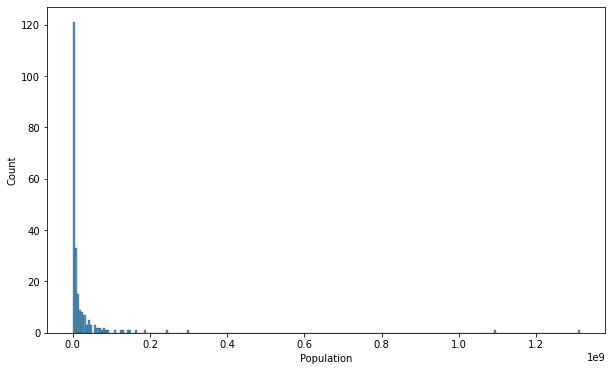

In [16]:
plt.figure (figsize= (10,6))
sns.histplot(data=df,x='Population')

**TASK: You should notice the histogram is skewed due to a few large countries, reset the X axis to only show countries with less than 0.5 billion people**

<AxesSubplot:xlabel='Population', ylabel='Count'>

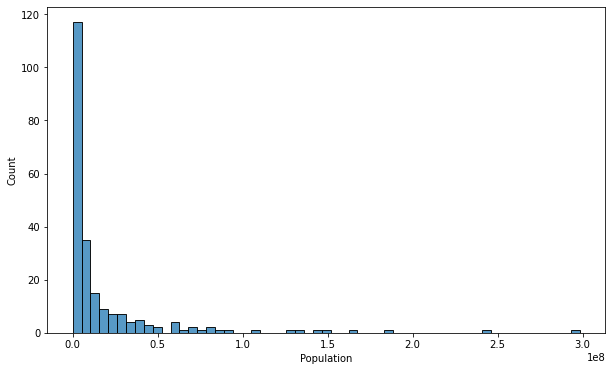

In [18]:
plt.figure (figsize= (10,6))
sns.histplot(data=df[df['Population']<500000000],x='Population')

In [20]:
df.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

**TASK: Now let's explore GDP and Regions. Create a bar chart showing the mean GDP per Capita per region (recall the black bar represents std).**

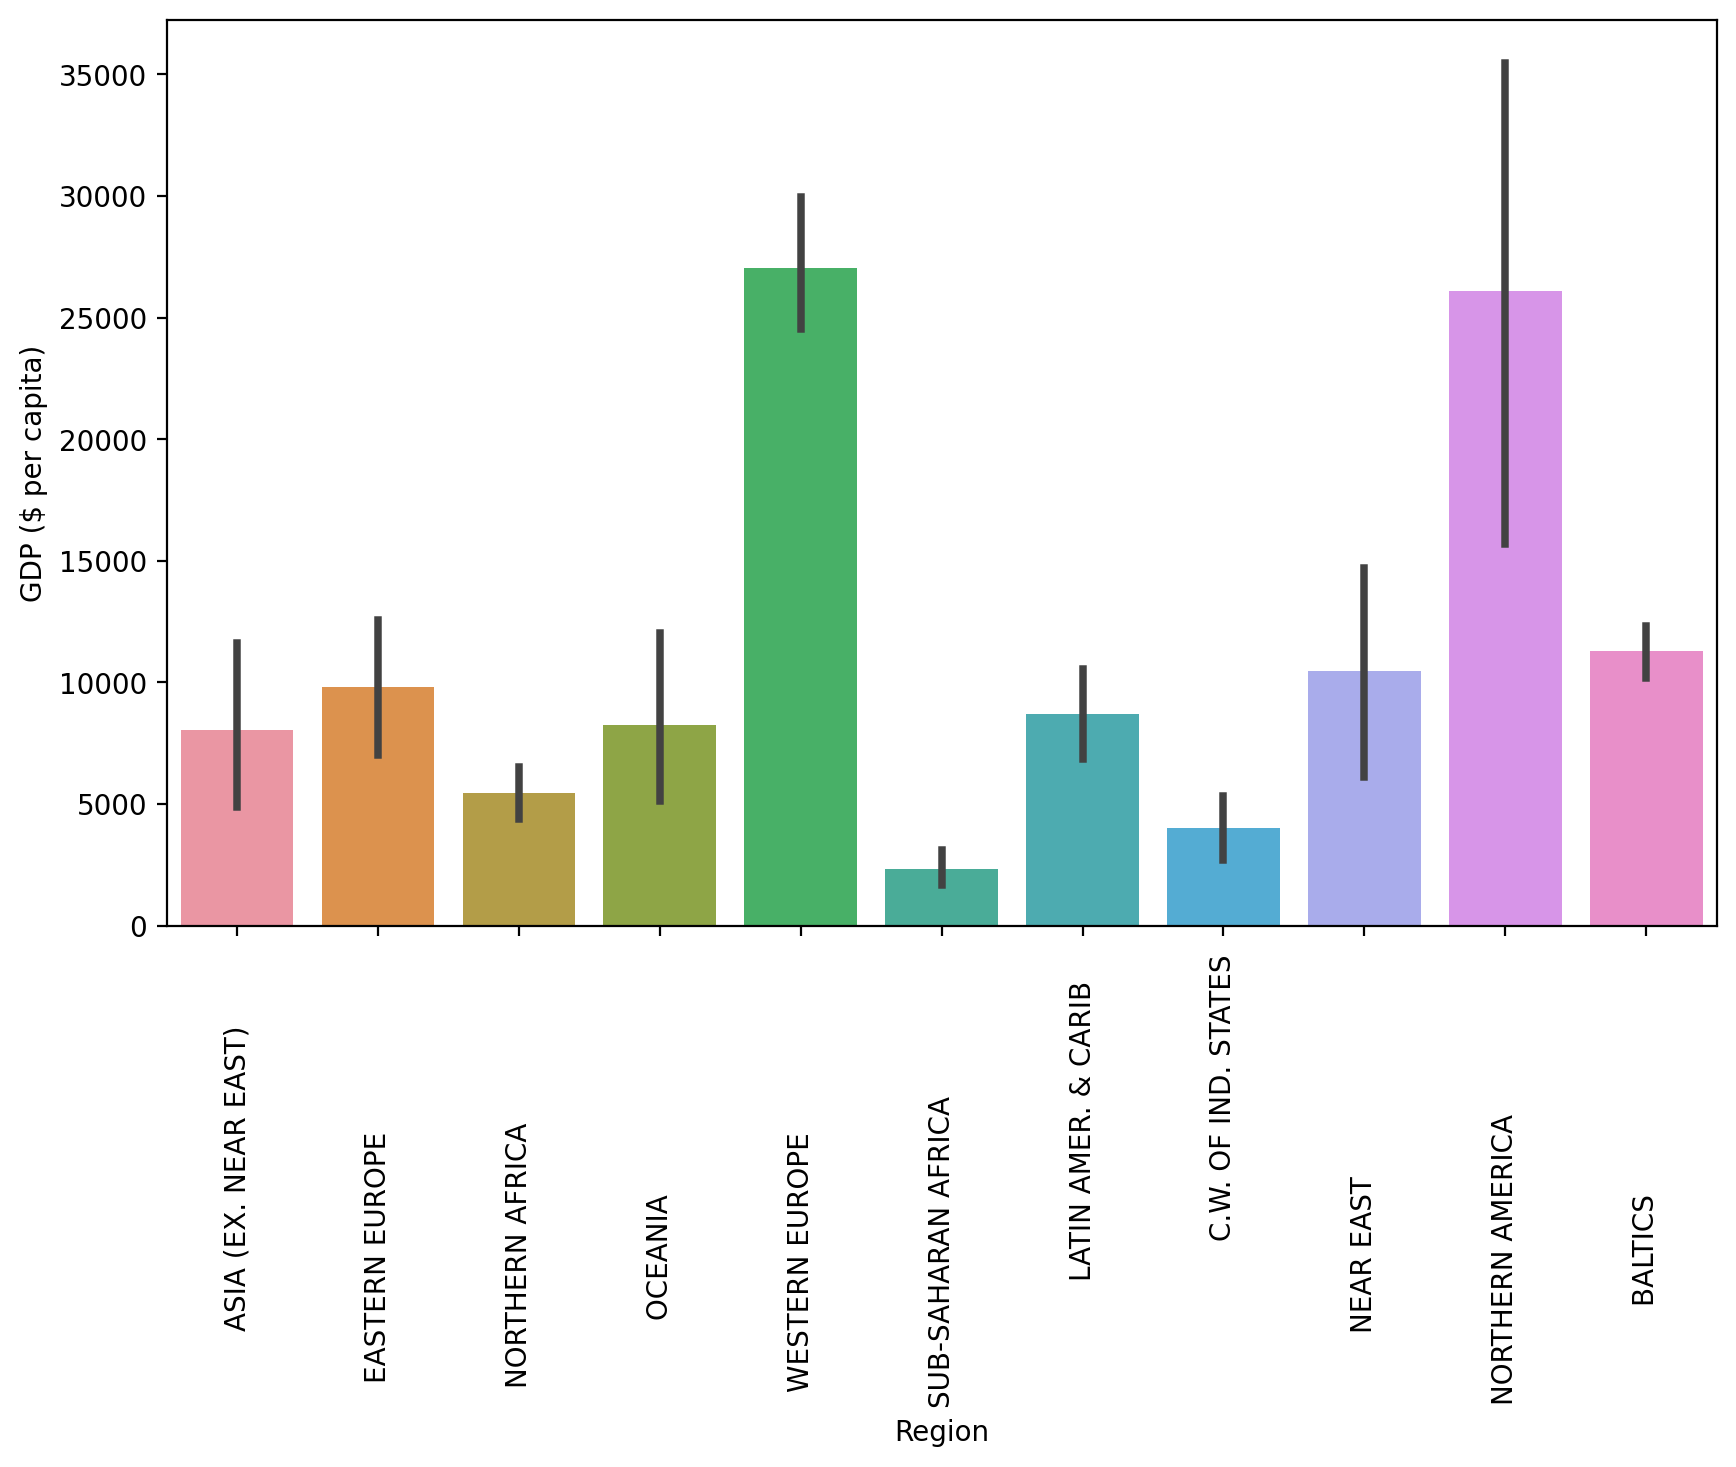

In [19]:
plt.figure(figsize=(10,6),dpi=200)
sns.barplot(data=df,y='GDP ($ per capita)',x='Region',estimator=np.mean)
plt.xticks(rotation=90);

**TASK: Create a scatterplot showing the relationship between Phones per 1000 people and the GDP per Capita. Color these points by Region.**

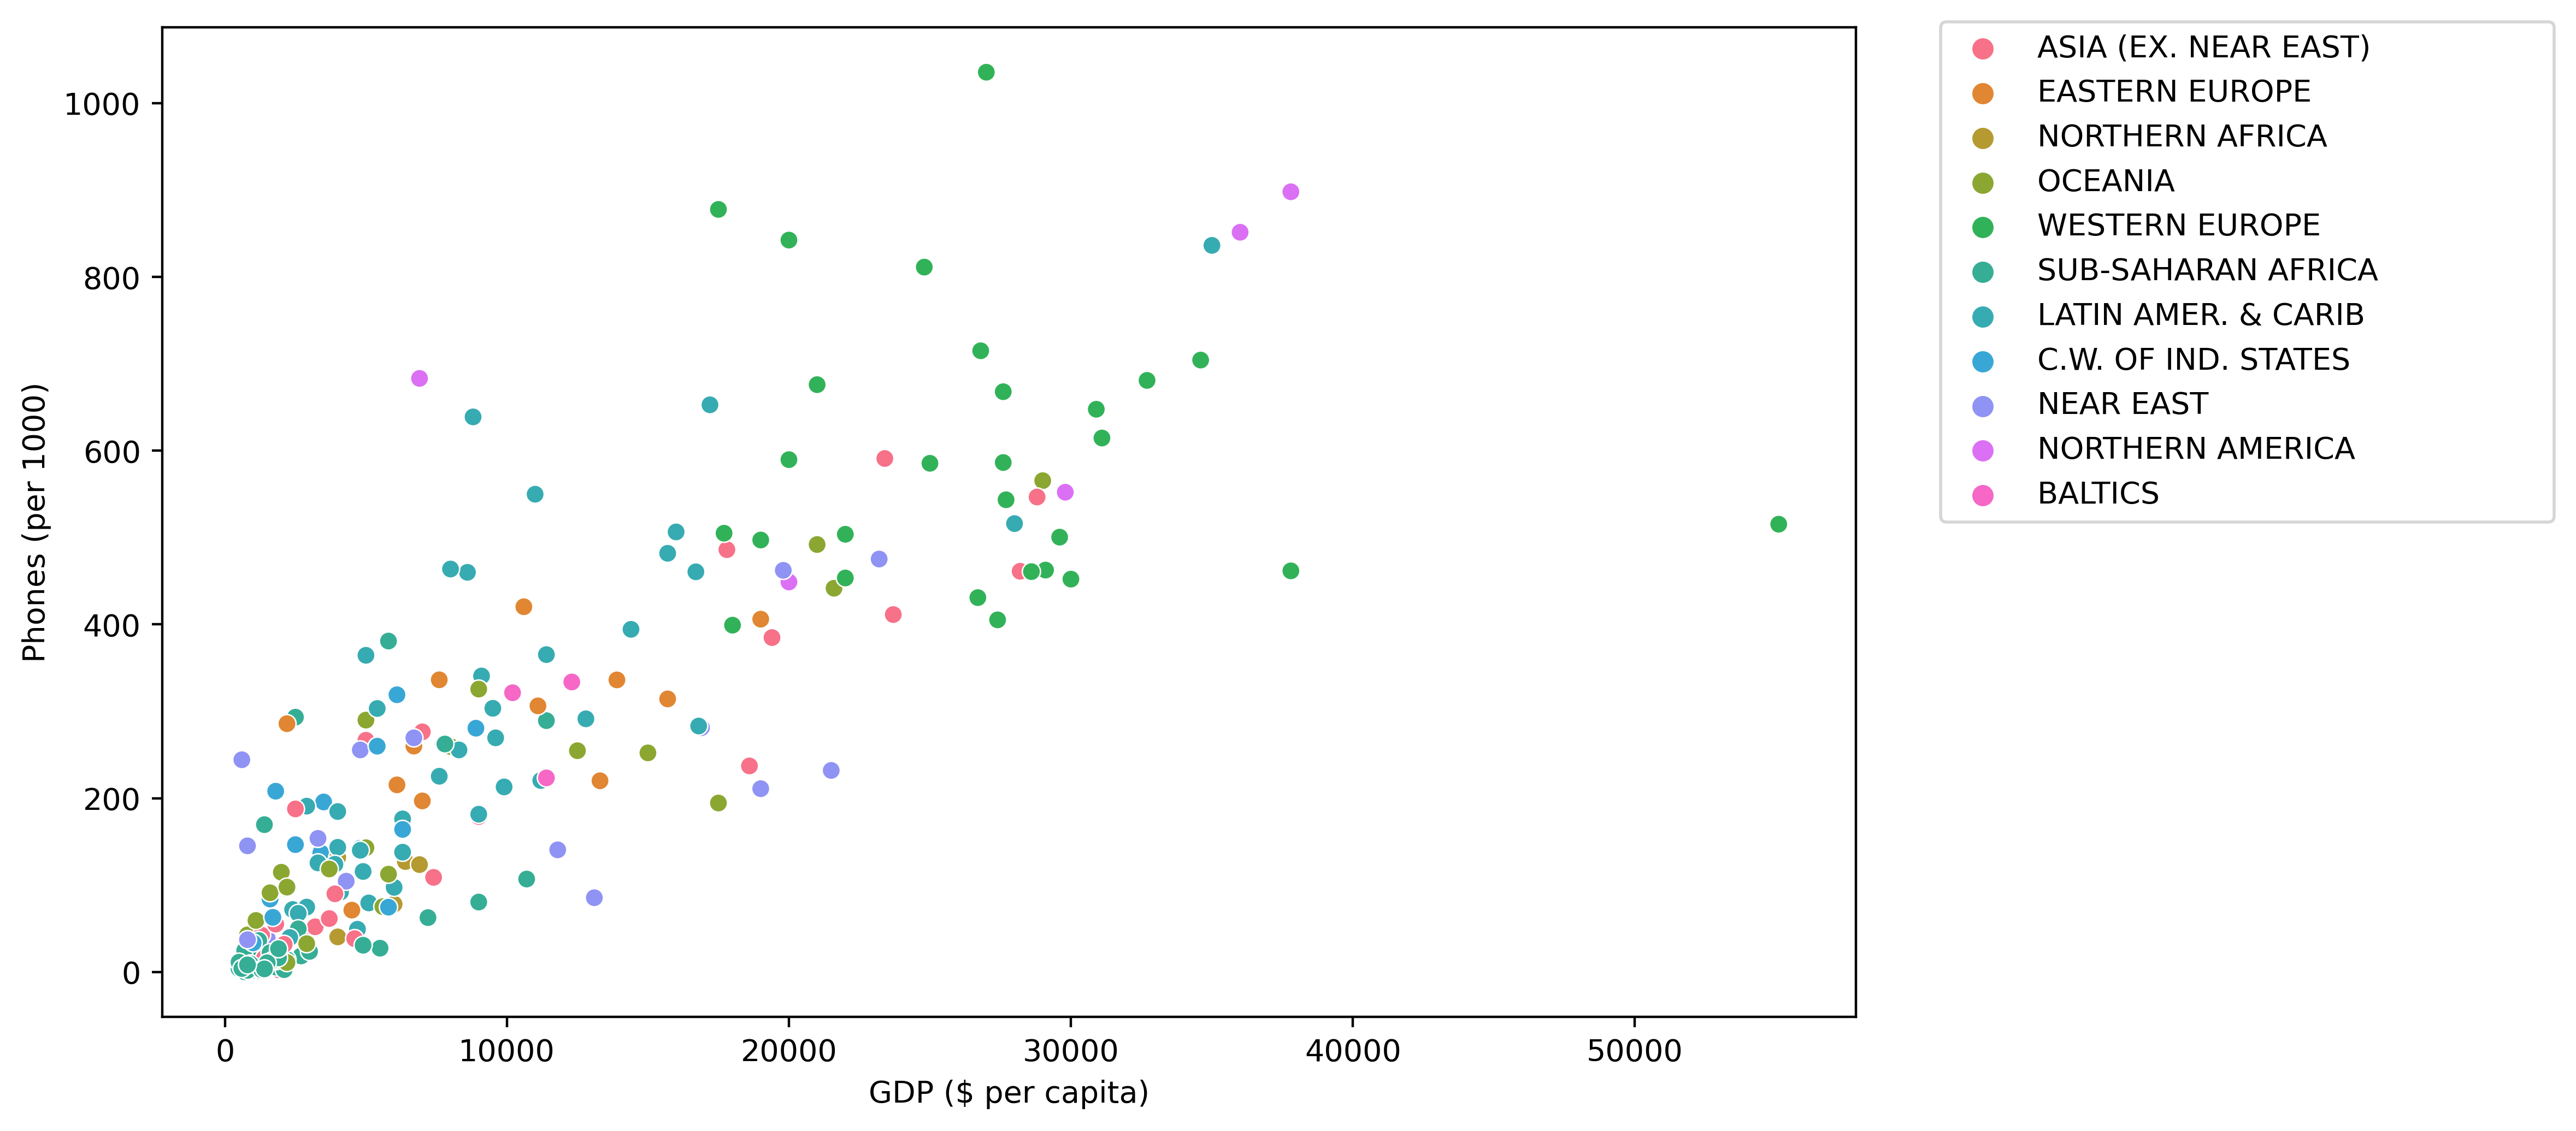

In [26]:
plt.figure(figsize=(10,6),dpi=400)
sns.scatterplot(data=df,x='GDP ($ per capita)',y='Phones (per 1000)',hue='Region')
plt.legend(loc=(1.05,0.5))

In [28]:
df[df["GDP ($ per capita)"]>50000]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
121,Luxembourg,WESTERN EUROPE,474413,2586,183.5,0.0,8.97,4.81,55100.0,100.0,515.4,23.28,0.4,76.32,NaN,11.94,8.41,0.01,0.13,0.86


**TASK: Create a scatterplot showing the relationship between GDP per Capita and Literacy (color the points by Region). What conclusions do you draw from this plot?**

<AxesSubplot:xlabel='GDP ($ per capita)', ylabel='Literacy (%)'>

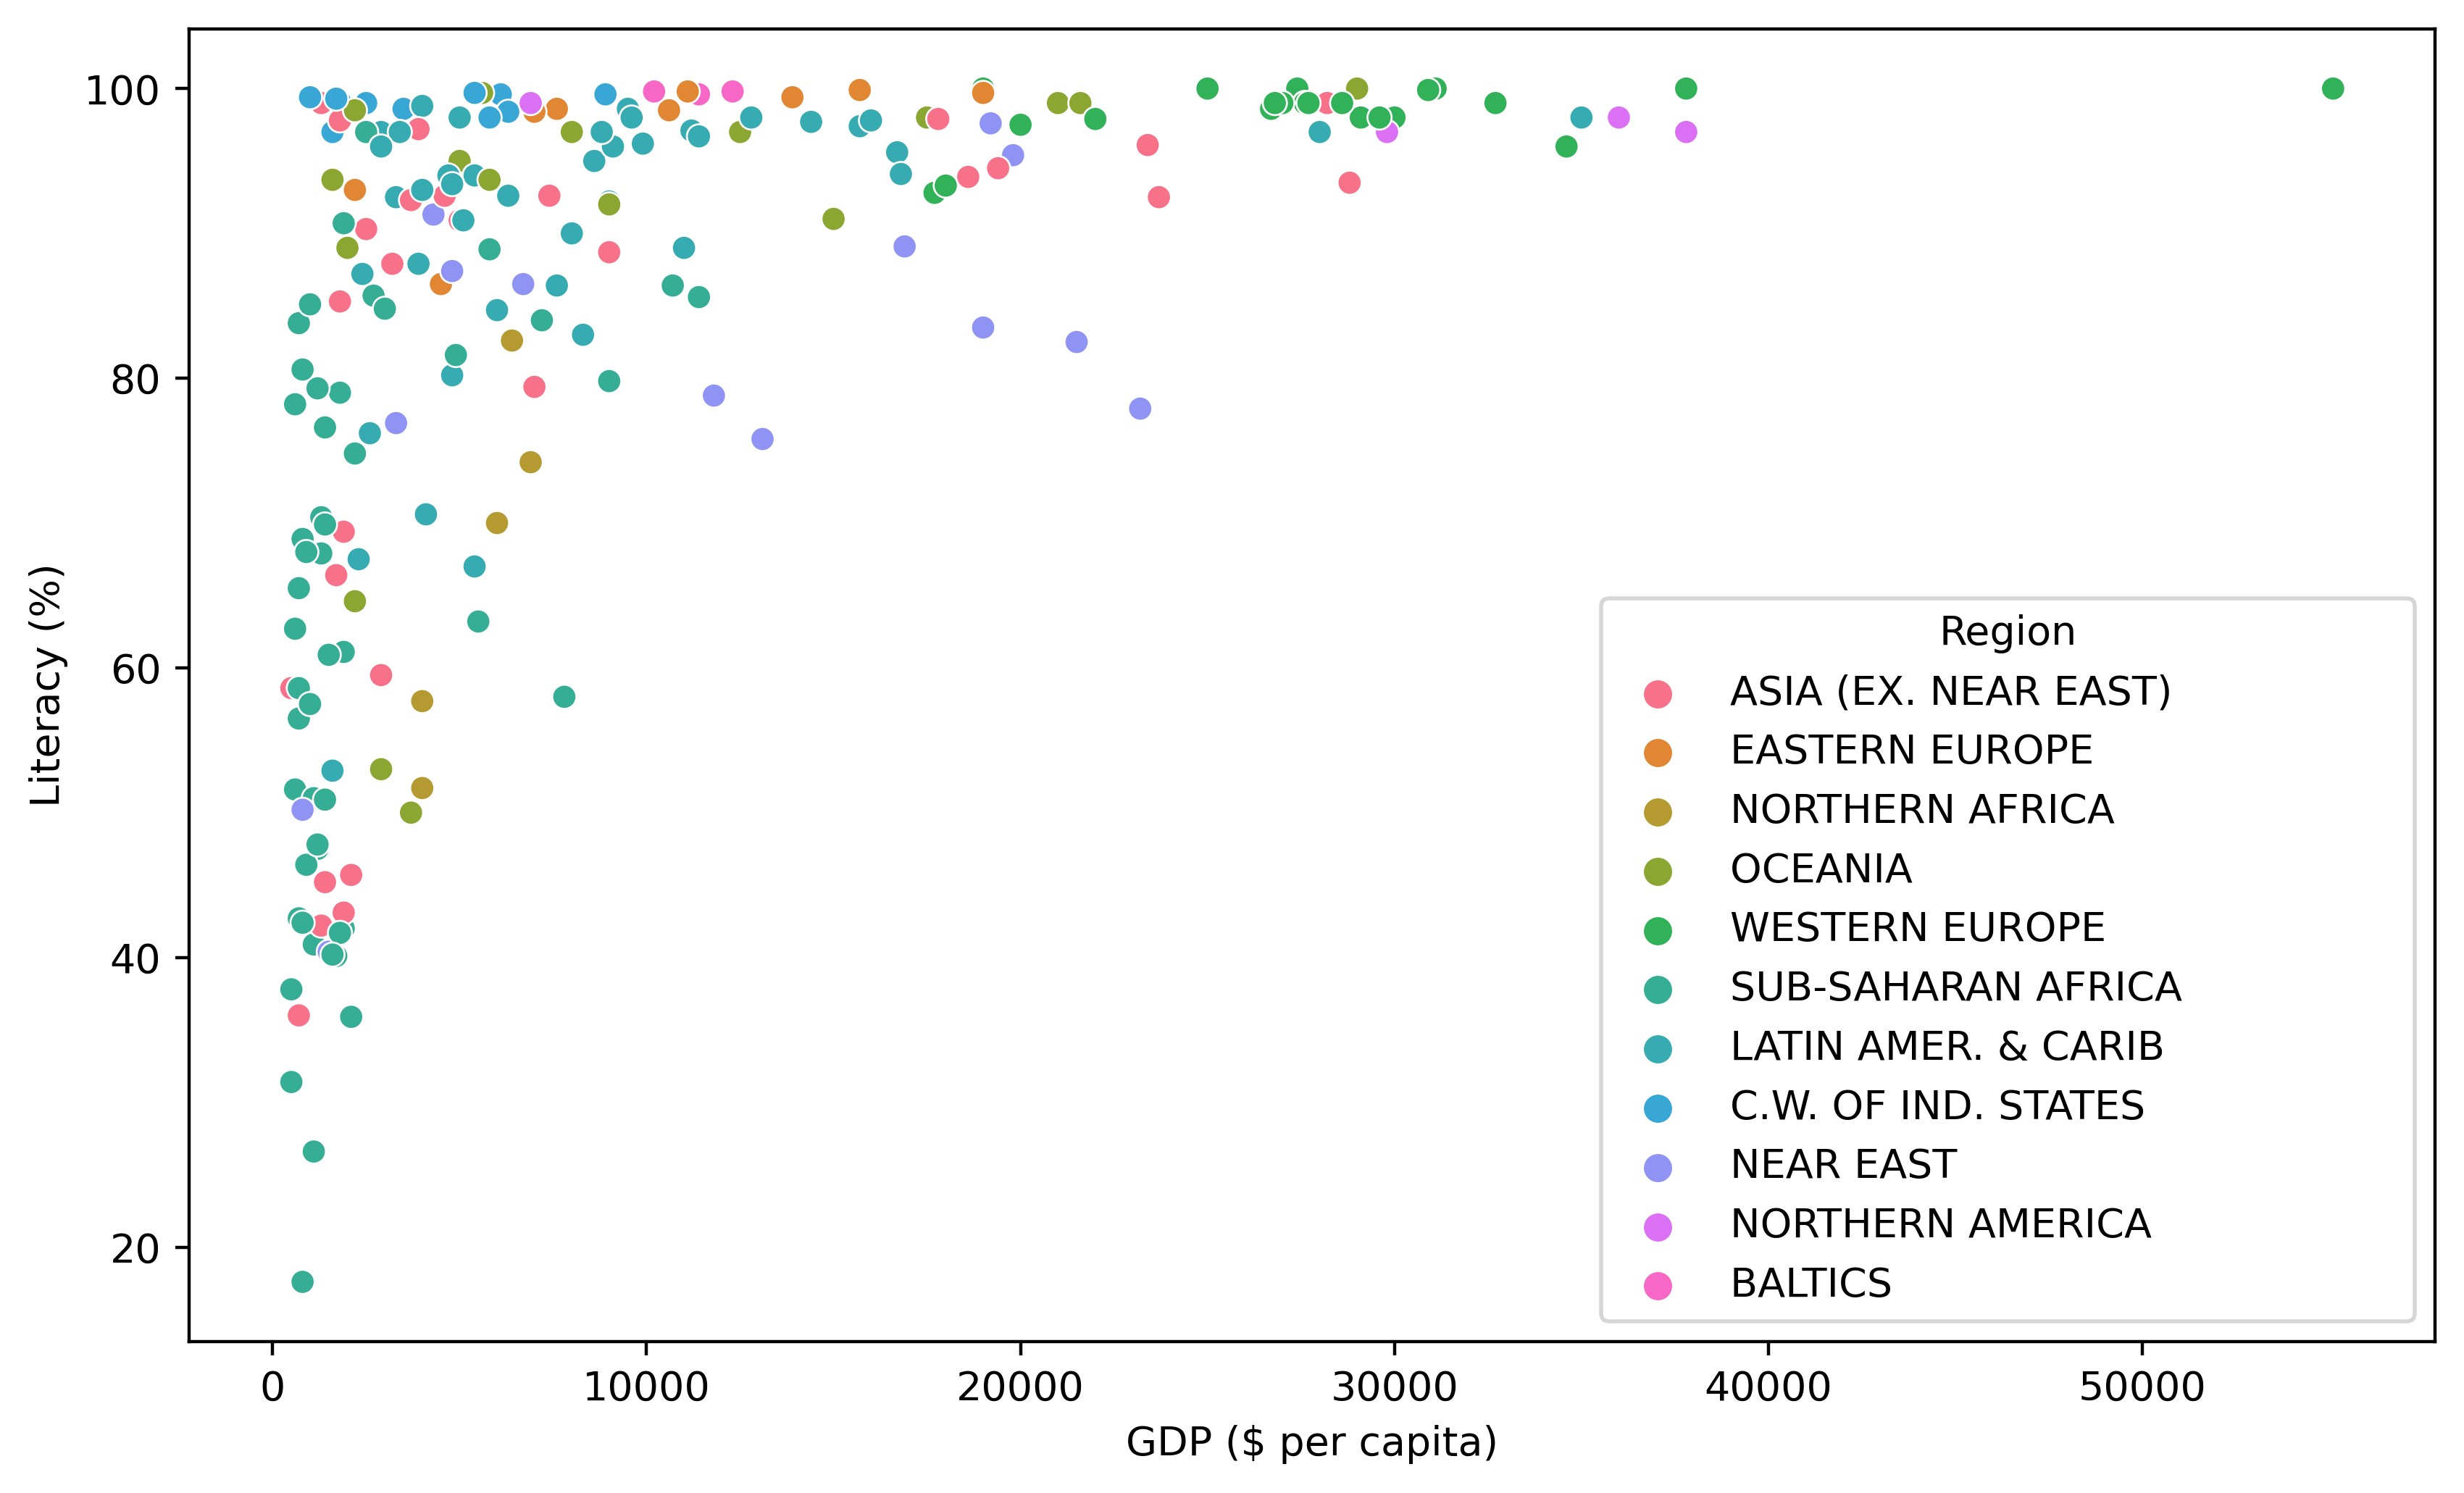

In [23]:
plt.figure(figsize=(10,6),dpi=400)
sns.scatterplot(data=df,x='GDP ($ per capita)',y='Literacy (%)',hue='Region')

**TASK: Create a Heatmap of the Correlation between columns in the DataFrame.**

<AxesSubplot:>

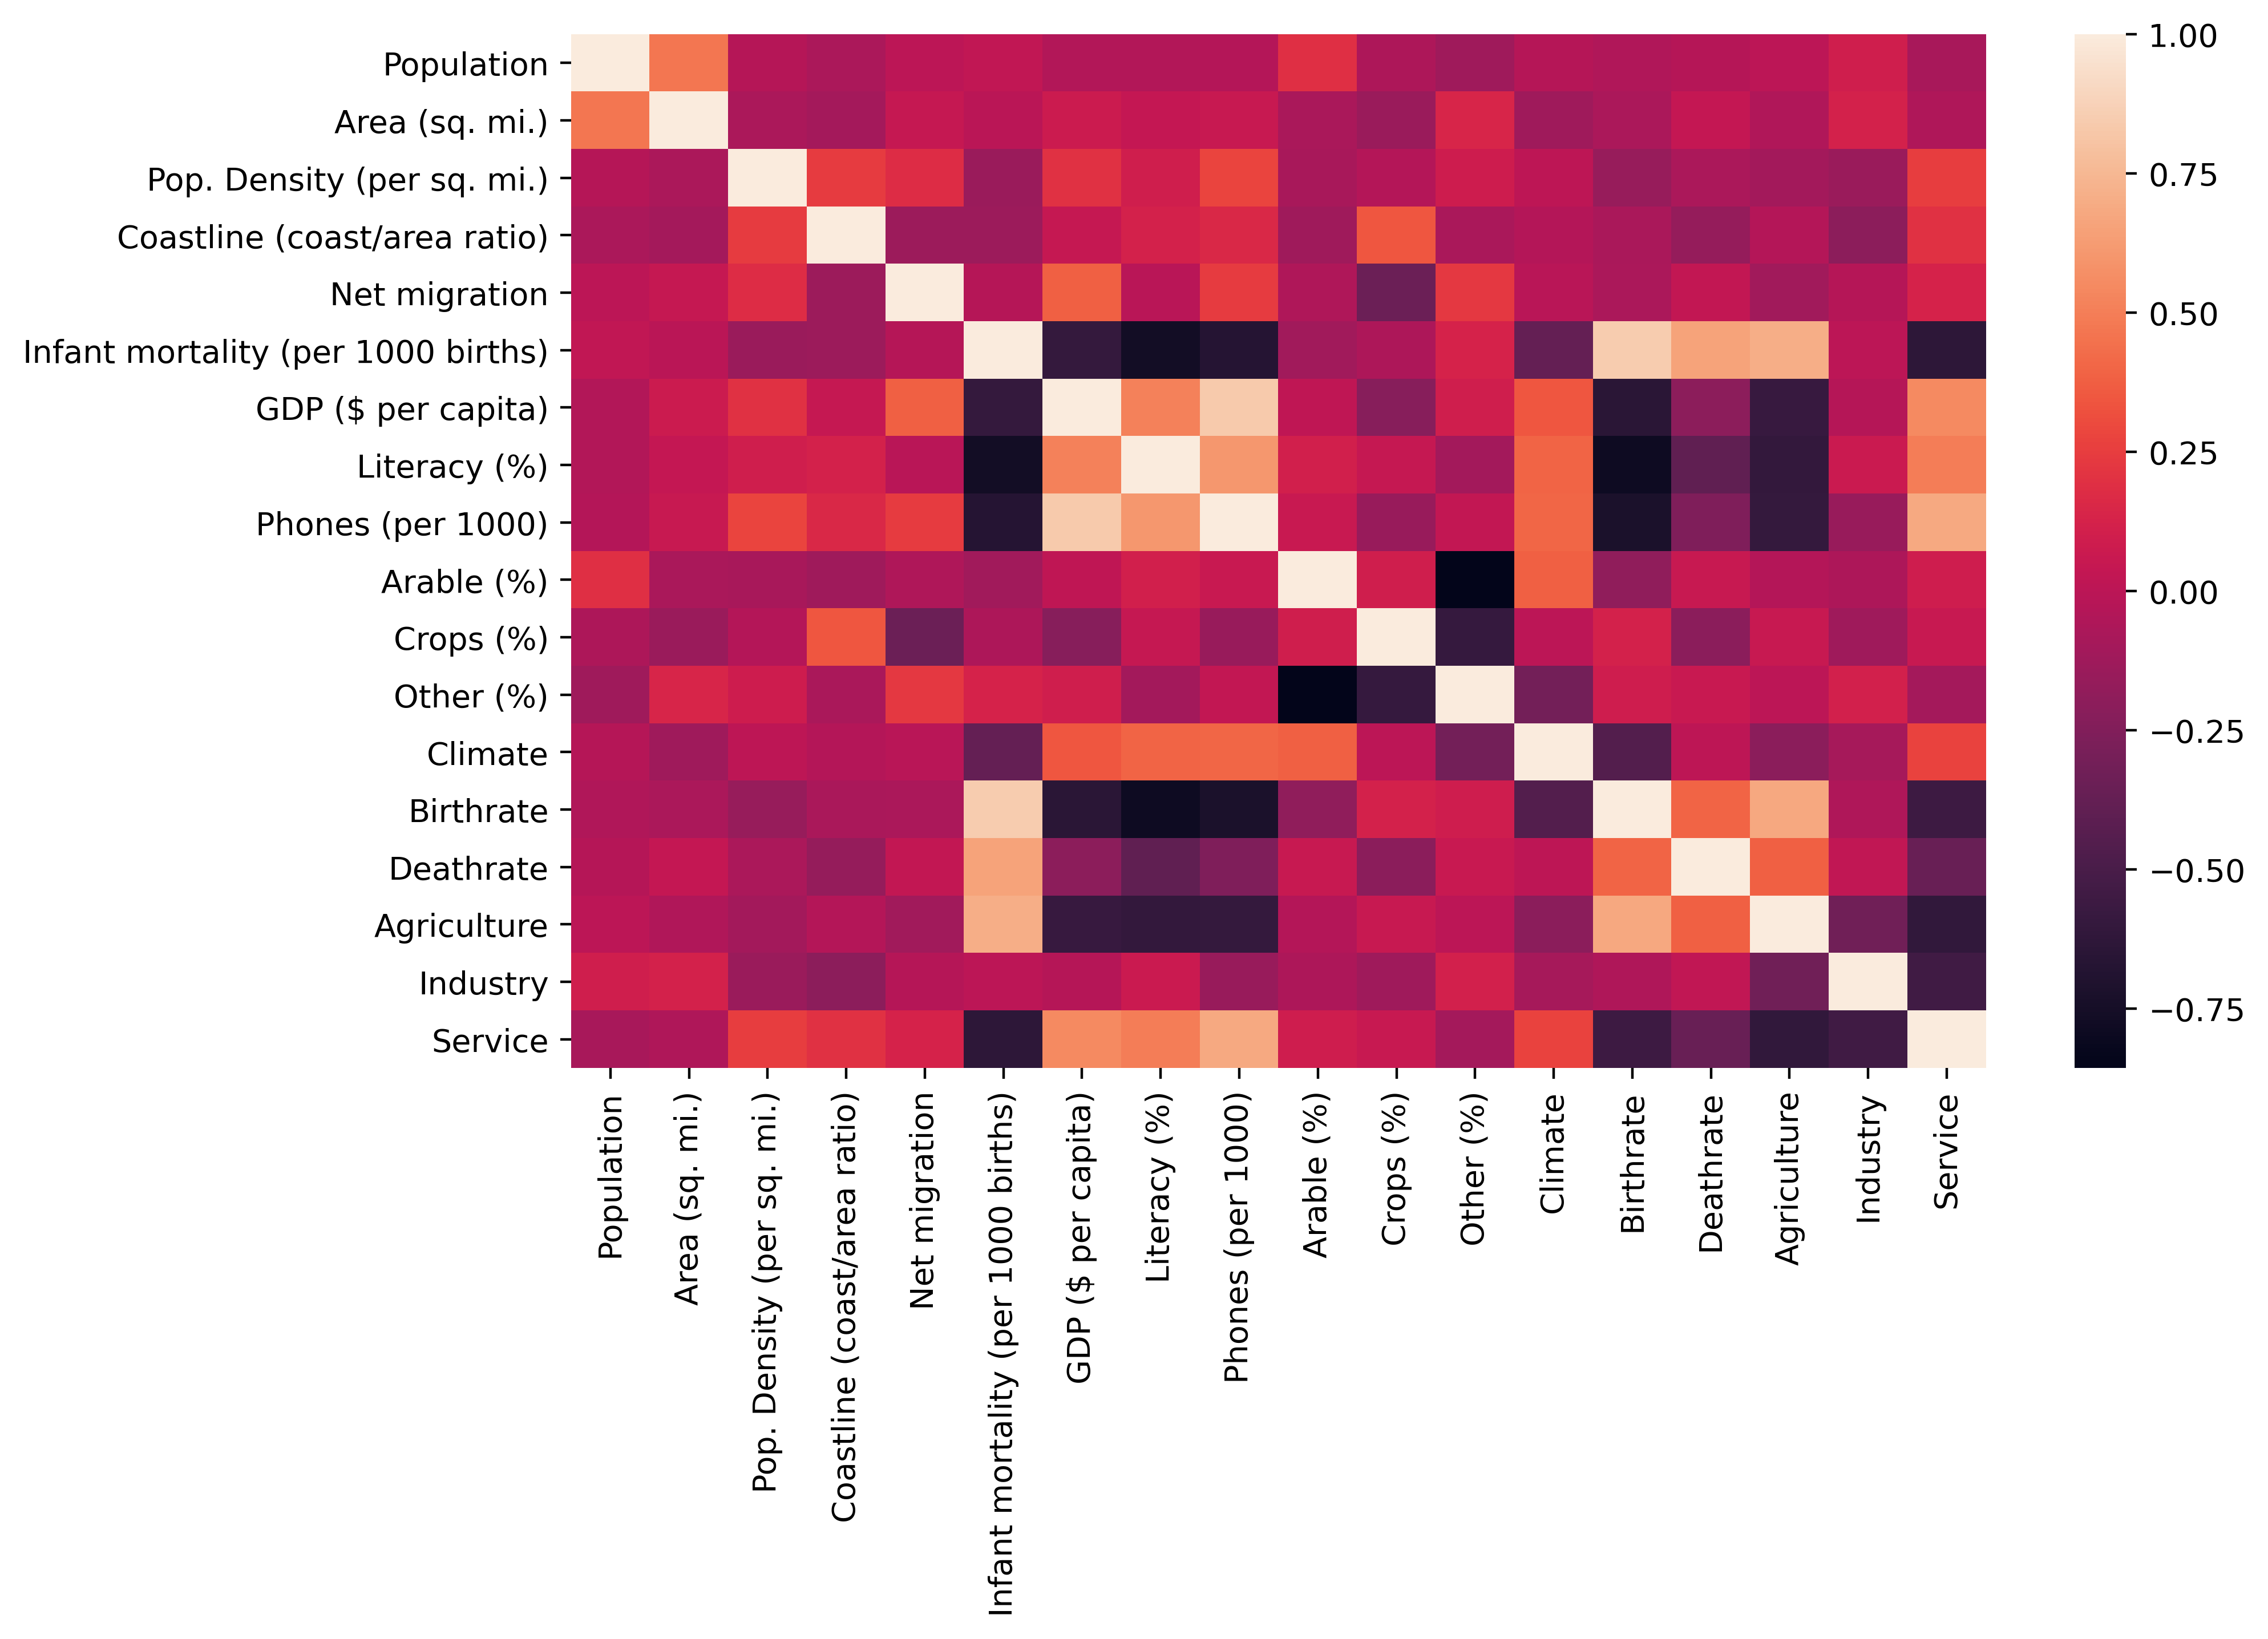

In [24]:
plt.figure(figsize=(10,6),dpi=400)
sns.heatmap(df.corr())

**TASK: Seaborn can auto perform hierarchal clustering through the clustermap() function. Create a clustermap of the correlations between each column with this function.**

<Figure size 4000x2400 with 0 Axes>

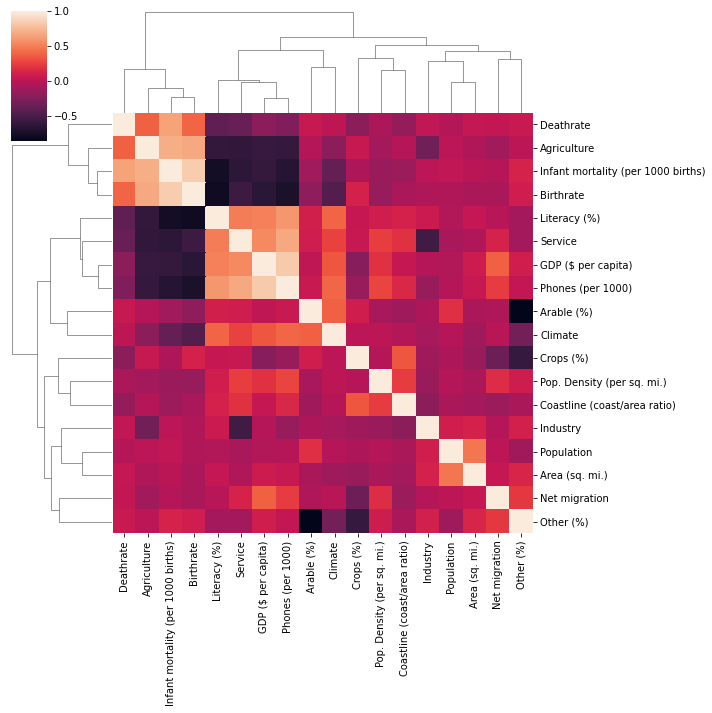

In [25]:
plt.figure(figsize=(10,6),dpi=400)
sns.clustermap(df.corr())

-----

## Data Preparation and Model Discovery

Let's now prepare our data for Kmeans Clustering!

### Missing Data

**TASK: Report the number of missing elements per column.**

In [30]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

**TASK: What countries have NaN for Agriculture? What is the main aspect of these countries?**

In [31]:
df[df['Agriculture'].isnull()]['Country']

3            American Samoa
4                   Andorra
78                Gibraltar
80                Greenland
83                     Guam
134                 Mayotte
140              Montserrat
144                   Nauru
153      N. Mariana Islands
171            Saint Helena
174    St Pierre & Miquelon
177              San Marino
208       Turks & Caicos Is
221       Wallis and Futuna
223          Western Sahara
Name: Country, dtype: object

**TASK: You should have noticed most of these countries are tiny islands, with the exception of Greenland and Western Sahara. Go ahead and fill any of these countries missing NaN values with 0, since they are so small or essentially non-existant. There should be 15 countries in total you do this for. For a hint on how to do this, recall you can do the following:**

    df[df['feature'].isnull()]
    

In [34]:
df[df['Agriculture'].isnull()] = df[df['Agriculture'].isnull()].fillna(0)

In [37]:
df[df['Agriculture'].isnull()]['Country'] 

Series([], Name: Country, dtype: object)

**TASK: Now check to see what is still missing by counting number of missing elements again per feature:**

In [38]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          1
Infant mortality (per 1000 births)     1
GDP ($ per capita)                     0
Literacy (%)                          13
Phones (per 1000)                      2
Arable (%)                             1
Crops (%)                              1
Other (%)                              1
Climate                               18
Birthrate                              1
Deathrate                              2
Agriculture                            0
Industry                               1
Service                                1
dtype: int64

**TASK: Notice climate is missing for a few countries, but not the Region! Let's use this to our advantage. Fill in the missing Climate values based on the mean climate value for its region.**

Hints on how to do this: https://stackoverflow.com/questions/19966018/pandas-filling-missing-values-by-mean-in-each-group


In [39]:
df['Climate'] = df['Climate'].fillna(df.groupby('Region')['Climate'].transform('mean'))

**TASK: Check again on many elements are missing:**

In [40]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          1
Infant mortality (per 1000 births)     1
GDP ($ per capita)                     0
Literacy (%)                          13
Phones (per 1000)                      2
Arable (%)                             1
Crops (%)                              1
Other (%)                              1
Climate                                0
Birthrate                              1
Deathrate                              2
Agriculture                            0
Industry                               1
Service                                1
dtype: int64

**TASK: It looks like Literacy percentage is missing. Use the same tactic as we did with Climate missing values and fill in any missing Literacy % values with the mean Literacy % of the Region.**

In [41]:
df[df['Literacy (%)'].isnull()]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
25,Bosnia & Herzegovina,EASTERN EUROPE,4498976,51129,88.0,0.04,0.31,21.05,6100.0,NaN,215.4,13.60,2.96,83.44,4.000000,8.77,8.27,0.142,0.308,0.550
66,Faroe Islands,WESTERN EUROPE,47246,1399,33.8,79.84,1.41,6.24,22000.0,NaN,503.8,2.14,0.00,97.86,2.826087,14.05,8.70,0.270,0.110,0.620
74,Gaza Strip,NEAR EAST,1428757,360,3968.8,11.11,1.60,22.93,600.0,NaN,244.3,28.95,21.05,50.00,3.000000,39.45,3.80,0.030,0.283,0.687
85,Guernsey,WESTERN EUROPE,65409,78,838.6,64.10,3.84,4.71,20000.0,NaN,842.4,NaN,NaN,NaN,3.000000,8.81,10.01,0.030,0.100,0.870
99,Isle of Man,WESTERN EUROPE,75441,572,131.9,27.97,5.36,5.93,21000.0,NaN,676.0,9.00,0.00,91.00,3.000000,11.05,11.19,0.010,0.130,0.860
104,Jersey,WESTERN EUROPE,91084,116,785.2,60.34,2.76,5.24,24800.0,NaN,811.3,0.00,0.00,100.00,3.000000,9.30,9.28,0.050,0.020,0.930
108,Kiribati,OCEANIA,105432,811,130.0,140.94,0.00,48.52,800.0,NaN,42.7,2.74,50.68,46.58,2.000000,30.65,8.26,0.089,0.242,0.668
123,Macedonia,EASTERN EUROPE,2050554,25333,80.9,0.00,-1.45,10.09,6700.0,NaN,260.0,22.26,1.81,75.93,3.000000,12.02,8.77,0.118,0.319,0.563
185,Slovakia,EASTERN EUROPE,5439448,48845,111.4,0.00,0.30,7.41,13300.0,NaN,220.1,30.16,2.62,67.22,3.000000,10.65,9.45,0.035,0.294,0.672
187,Solomon Islands,OCEANIA,552438,28450,19.4,18.67,0.00,21.29,1700.0,NaN,13.4,0.64,2.00,97.36,2.000000,30.01,3.92,0.420,0.110,0.470


In [42]:
df['Literacy (%)'] = df['Literacy (%)'].fillna(df.groupby('Region')['Literacy (%)'].transform('mean'))

**TASK: Check again on the remaining missing values:**

In [43]:
df.isnull().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         1
Infant mortality (per 1000 births)    1
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     2
Arable (%)                            1
Crops (%)                             1
Other (%)                             1
Climate                               0
Birthrate                             1
Deathrate                             2
Agriculture                           0
Industry                              1
Service                               1
dtype: int64

**TASK: Optional: We are now missing values for only a few countries. Go ahead and drop these countries OR feel free to fill in these last few remaining values with any preferred methodology. For simplicity, we will drop these.**

In [44]:
df = df.dropna()

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             221 non-null    object 
 1   Region                              221 non-null    object 
 2   Population                          221 non-null    int64  
 3   Area (sq. mi.)                      221 non-null    int64  
 4   Pop. Density (per sq. mi.)          221 non-null    float64
 5   Coastline (coast/area ratio)        221 non-null    float64
 6   Net migration                       221 non-null    float64
 7   Infant mortality (per 1000 births)  221 non-null    float64
 8   GDP ($ per capita)                  221 non-null    float64
 9   Literacy (%)                        221 non-null    float64
 10  Phones (per 1000)                   221 non-null    float64
 11  Arable (%)                          221 non-n

## Data Feature Preparation

**TASK: It is now time to prepare the data for clustering. The Country column is still a unique identifier string, so it won't be useful for clustering, since its unique for each point. Go ahead and drop this Country column.**

In [46]:
X = df.drop("Country",axis=1)

**TASK: Now let's create the X array of features, the Region column is still categorical strings, use Pandas to create dummy variables from this column to create a finalzed X matrix of continuous features along with the dummy variables for the Regions.**

In [47]:
X = pd.get_dummies(X)

In [48]:
X.head()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),...,Region_BALTICS,Region_C.W. OF IND. STATES,Region_EASTERN EUROPE,Region_LATIN AMER. & CARIB,Region_NEAR EAST,Region_NORTHERN AFRICA,Region_NORTHERN AMERICA,Region_OCEANIA,Region_SUB-SAHARAN AFRICA,Region_WESTERN EUROPE
0,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,...,0,0,0,0,0,0,0,0,0,0
1,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,...,0,0,1,0,0,0,0,0,0,0
2,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,...,0,0,0,0,0,1,0,0,0,0
3,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,...,0,0,0,0,0,0,0,1,0,0
4,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,...,0,0,0,0,0,0,0,0,0,1


### Scaling

**TASK: Due to some measurements being in terms of percentages and other metrics being total counts (population), we should scale this data first. Use Sklearn to scale the X feature matrics.**

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [51]:
scaled_X

array([[ 0.0133285 ,  0.01855412, -0.20308668, ..., -0.31544015,
        -0.54772256, -0.36514837],
       [-0.21730118, -0.32370888, -0.14378531, ..., -0.31544015,
        -0.54772256, -0.36514837],
       [ 0.02905136,  0.97784988, -0.22956327, ..., -0.31544015,
        -0.54772256, -0.36514837],
       ...,
       [-0.06726127, -0.04756396, -0.20881553, ..., -0.31544015,
        -0.54772256, -0.36514837],
       [-0.15081724,  0.07669798, -0.22840201, ..., -0.31544015,
         1.82574186, -0.36514837],
       [-0.14464933, -0.12356132, -0.2160153 , ..., -0.31544015,
         1.82574186, -0.36514837]])

### Creating and Fitting Kmeans Model

**TASK: Use a for loop to create and fit multiple KMeans models, testing from K=2-30 clusters. Keep track of the Sum of Squared Distances for each K value, then plot this out to create an "elbow" plot of K versus SSD. Optional: You may also want to create a bar plot showing the SSD difference from the previous cluster.**

In [52]:
from sklearn.cluster import KMeans

In [747]:
from sklearn.cluster import KMeans

In [53]:
ssd = []

for k in range(2,30):
    
    model = KMeans(n_clusters=k)
    
    
    model.fit(scaled_X)
    
    ssd.append(model.inertia_)

Text(0, 0.5, ' Sum of Squared Distances')

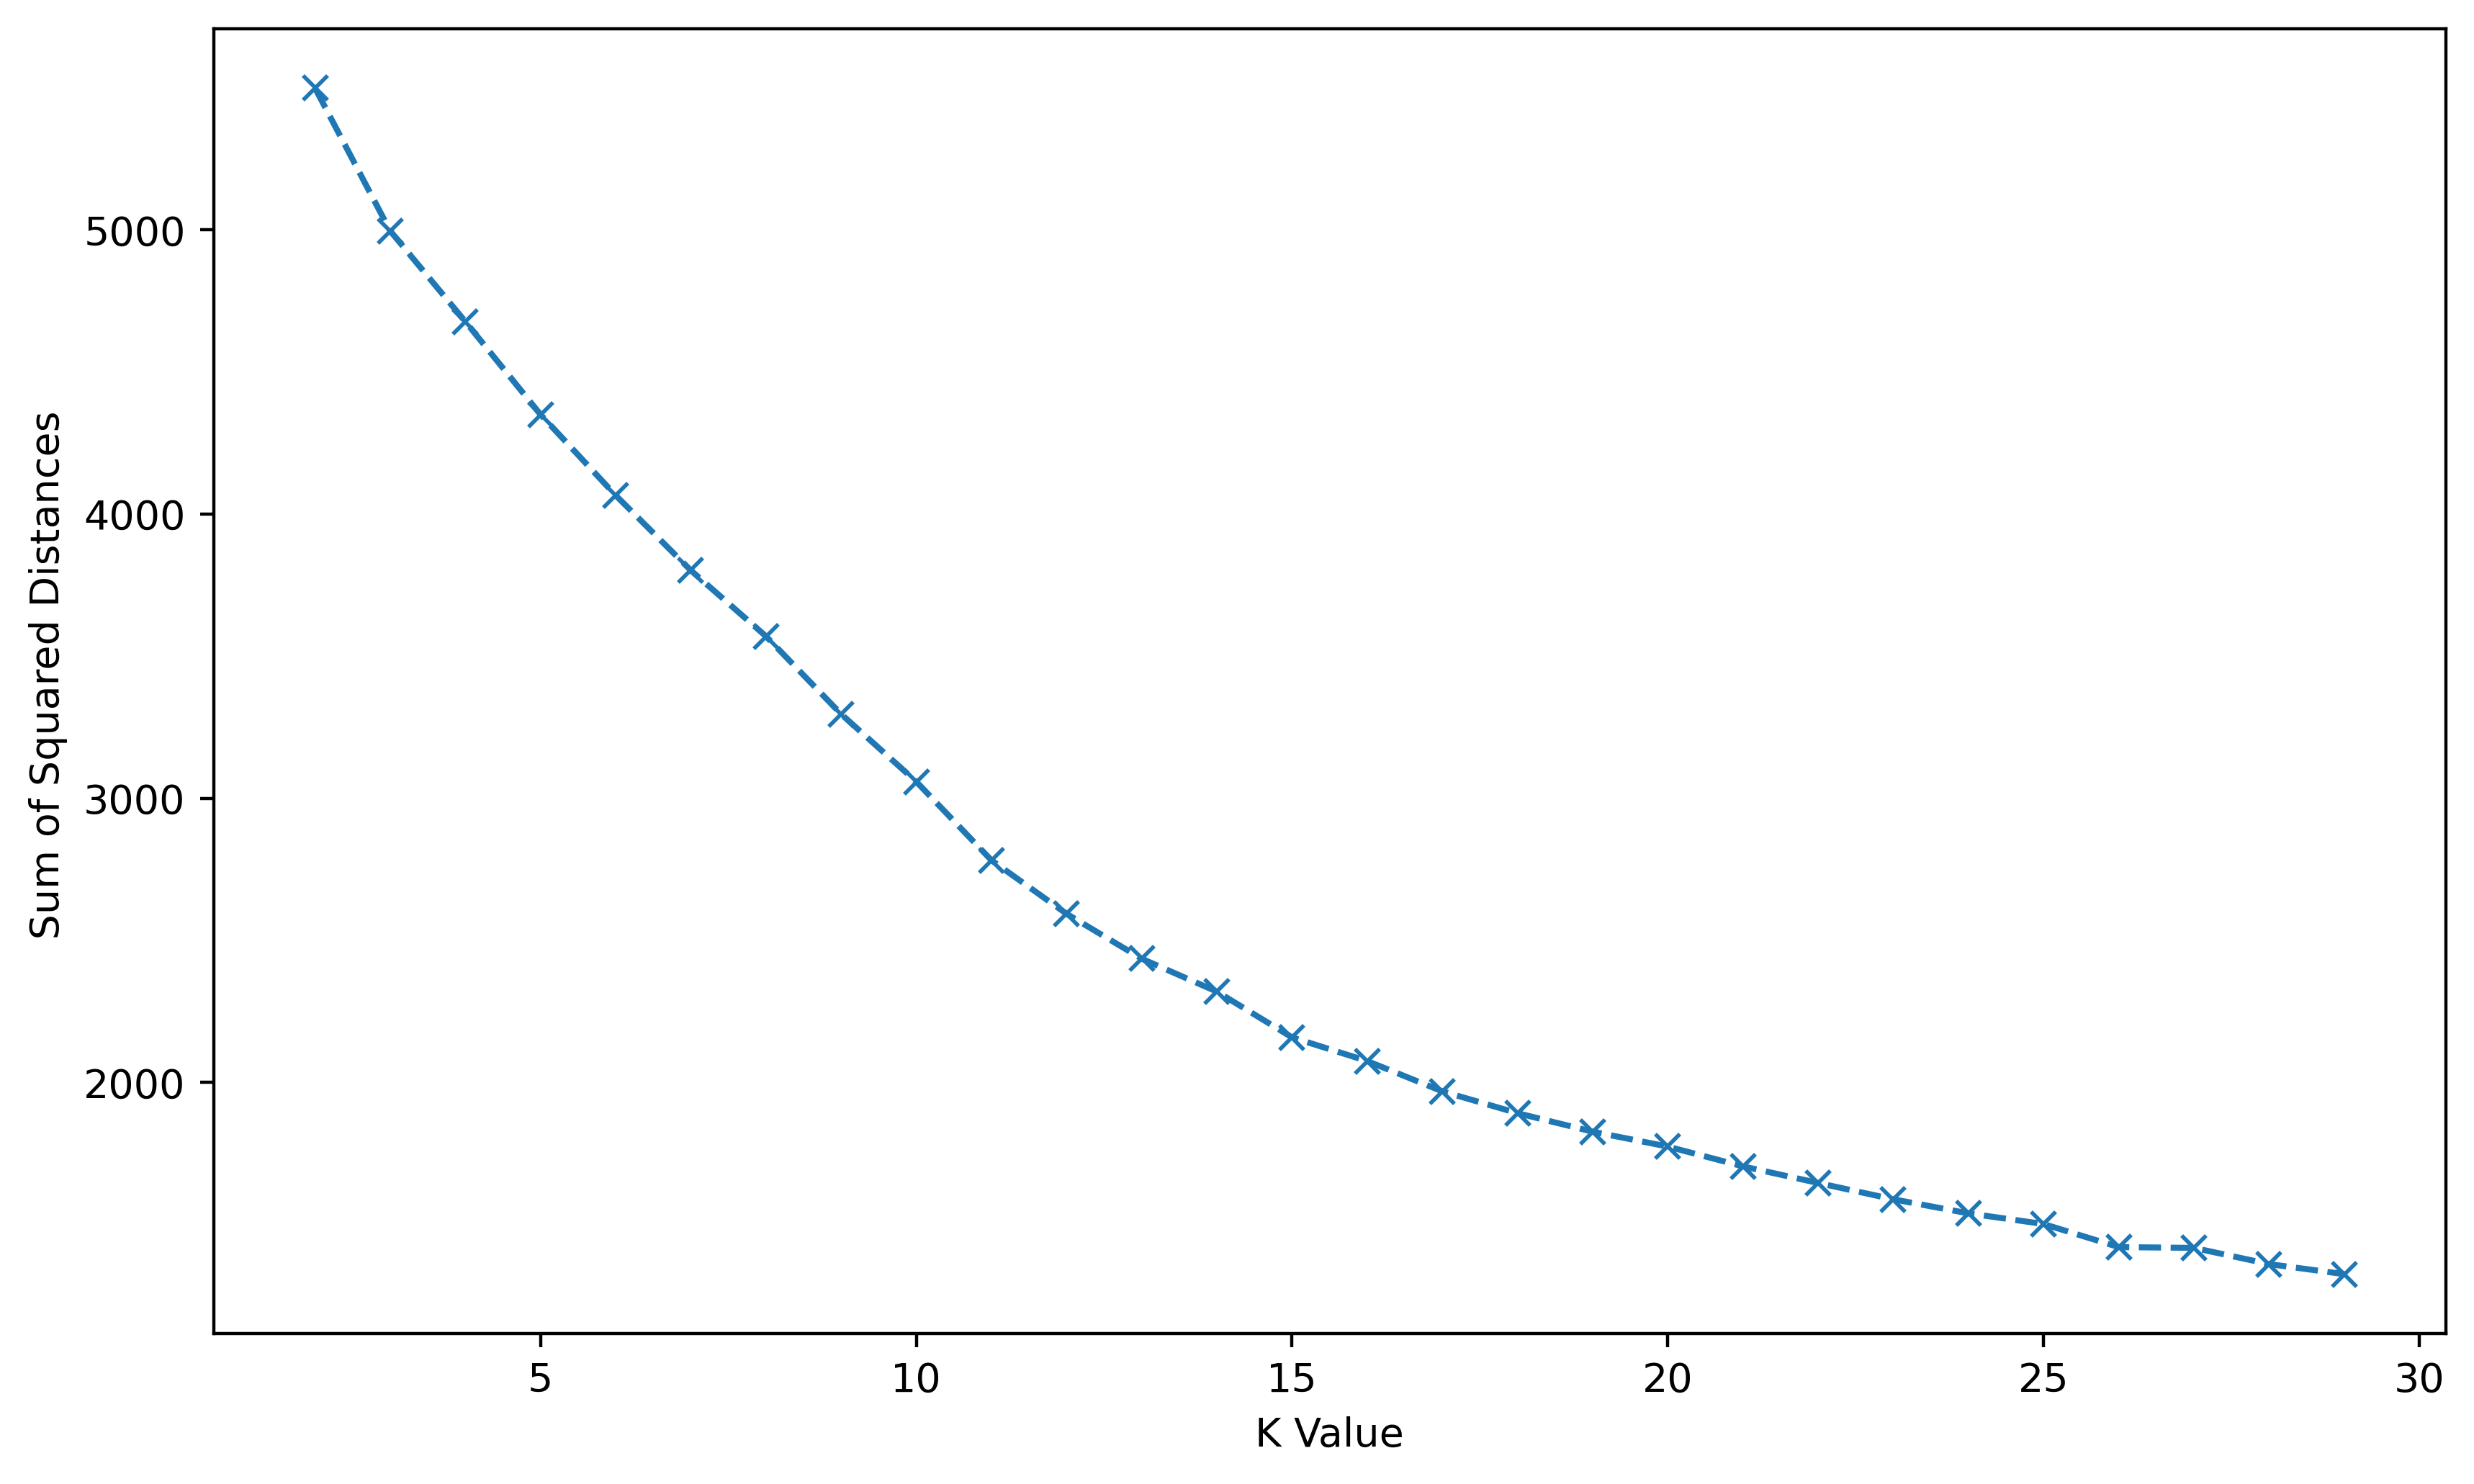

In [60]:
plt.figure(figsize=(10,6),dpi=400)
plt.plot(range(2,30),ssd,'x--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")

<AxesSubplot:>

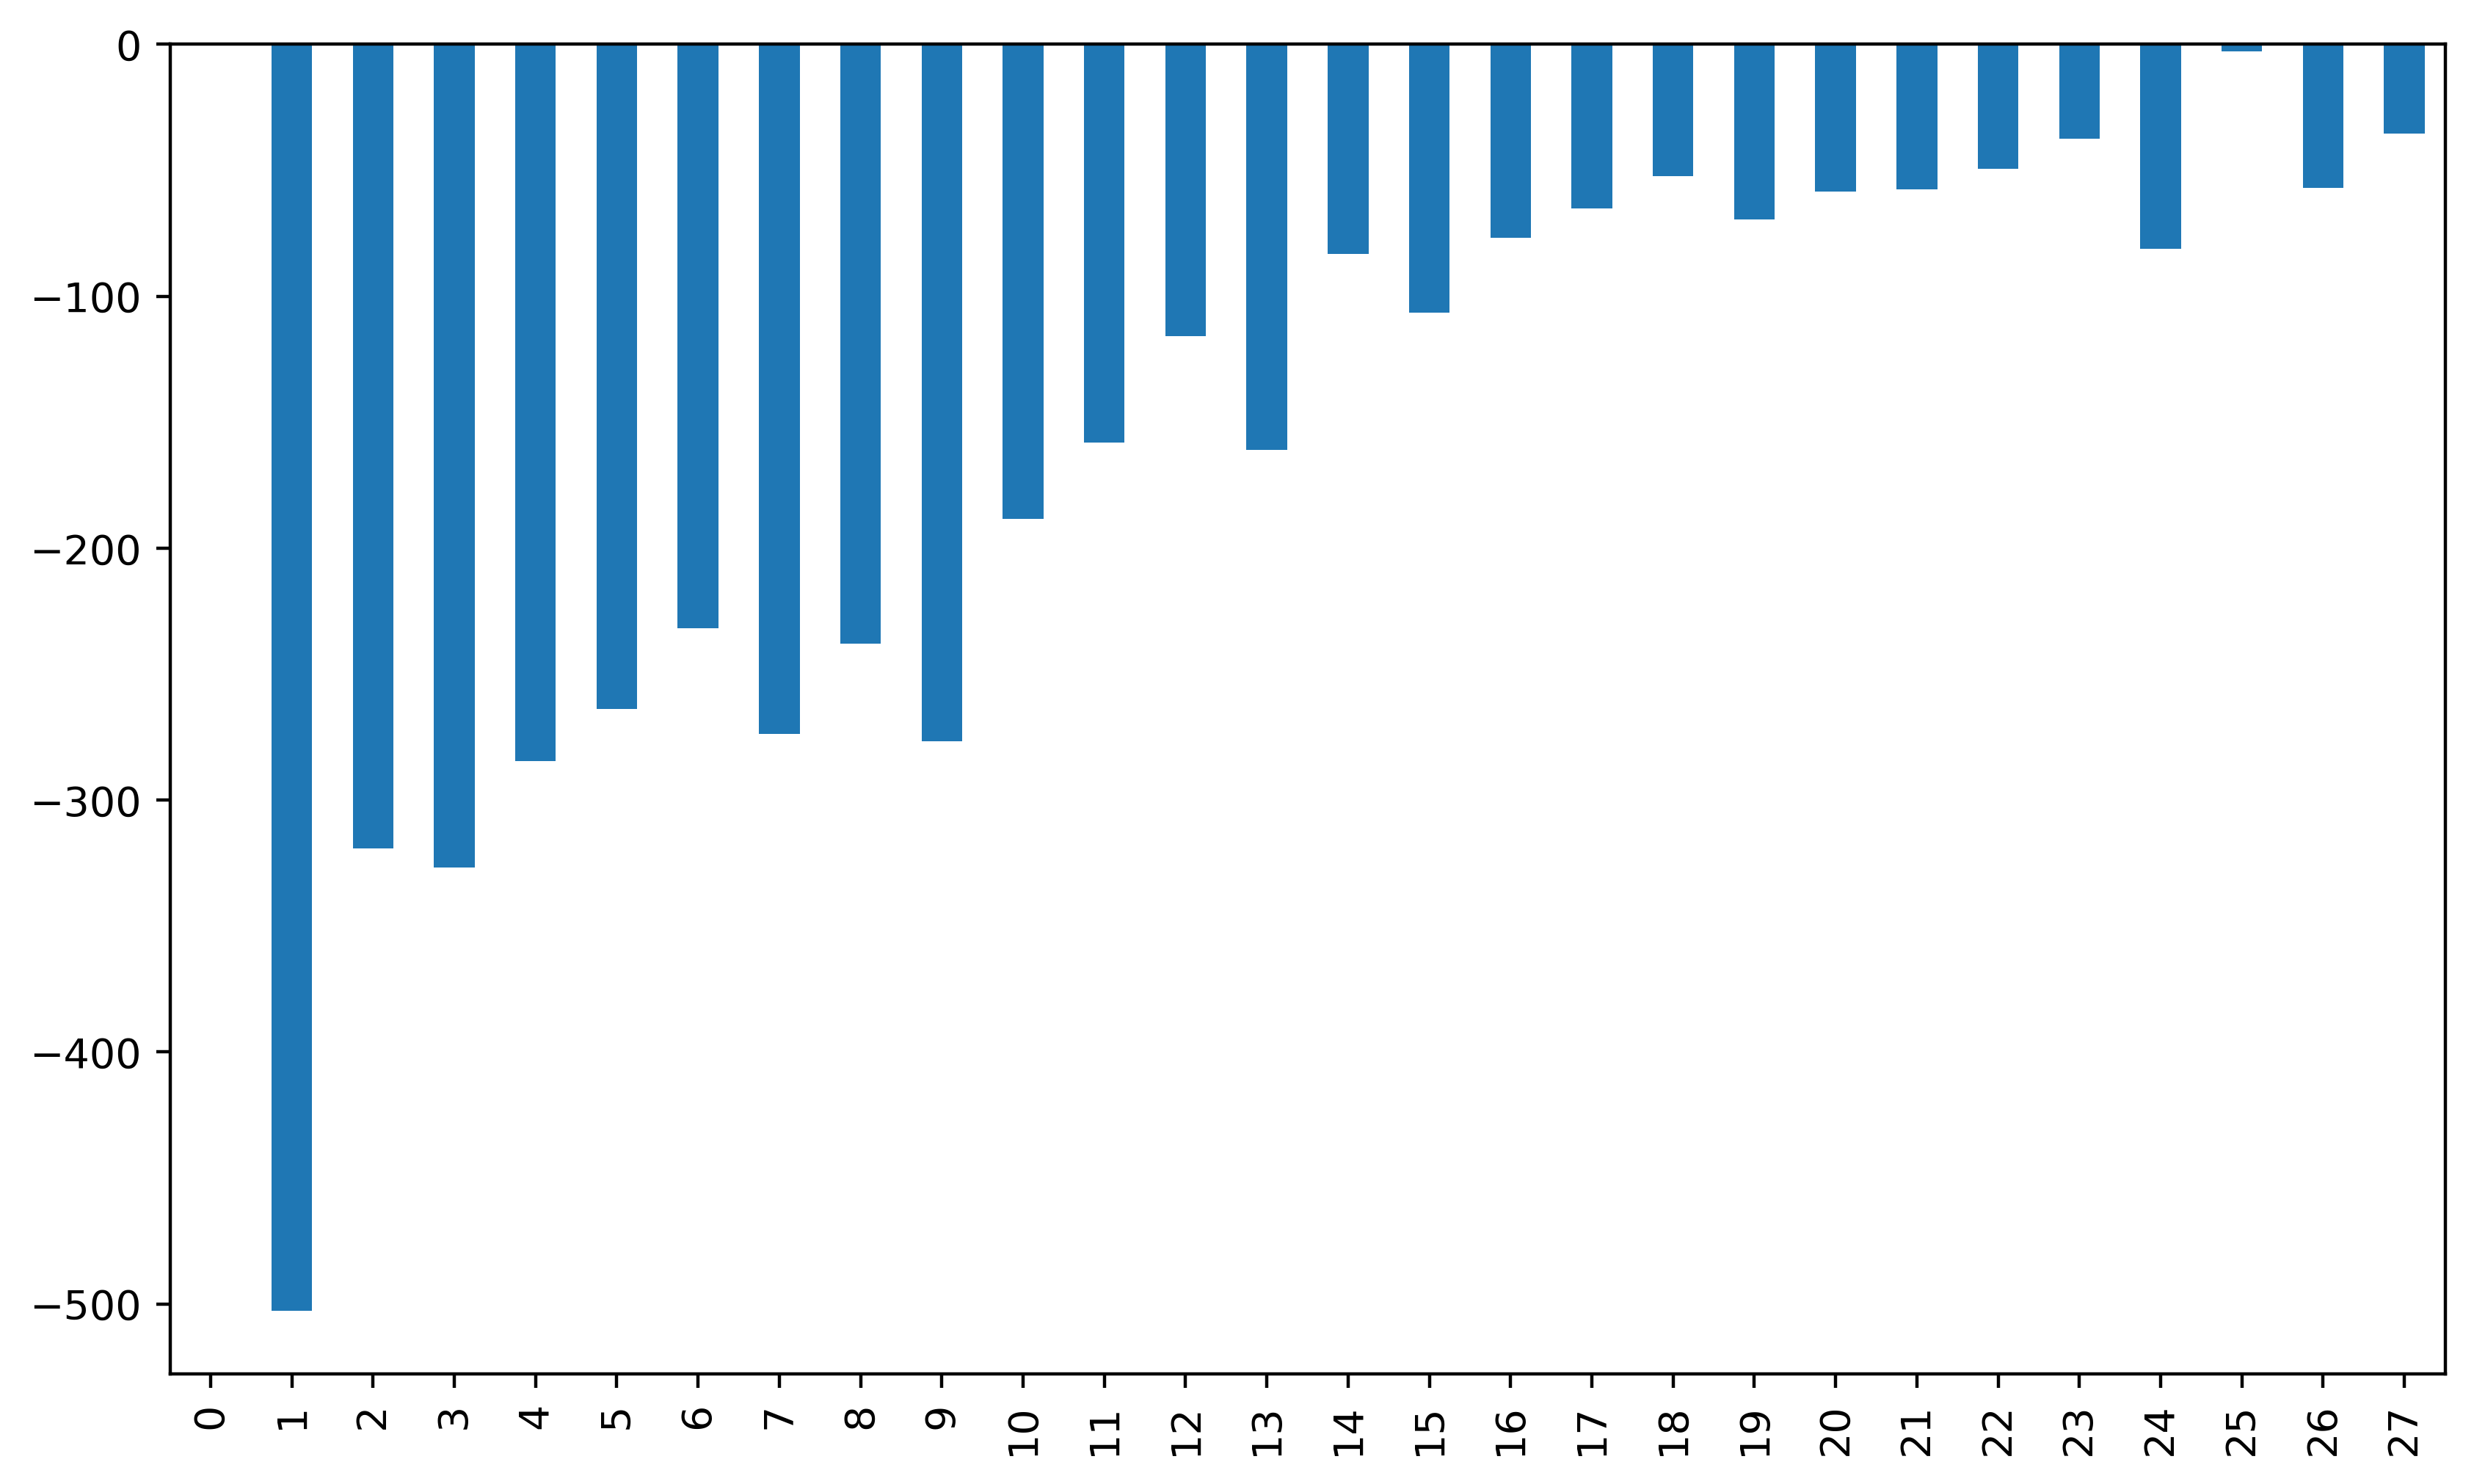

In [58]:
plt.figure(figsize=(10,6),dpi=400)
pd.Series(ssd).diff().plot(kind='bar')

-----

# Model Interpretation


**TASK: What K value do you think is a good choice? Are there multiple reasonable choices? What features are helping define these cluster choices. As this is unsupervised learning, there is no 100% correct answer here. Please feel free to jump to the solutions for a full discussion on this!.**

In [751]:
# Nothing to really code here, but choose a K value and see what features 
# are most correlated to belonging to a particular cluster!

# Remember, there is no 100% correct answer here!

-----


#### Example Interpretation: Choosing K=3

**One could say that there is a significant drop off in SSD difference at K=3 (although we can see it continues to drop off past this). What would an analysis look like for K=3? Let's explore which features are important in the decision of 3 clusters!**

In [61]:
model = KMeans(n_clusters=3)
model.fit(scaled_X)

KMeans(n_clusters=3)

In [62]:
model.labels_

array([0, 2, 2, 2, 1, 0, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 0,
       1, 0, 2, 1, 0, 2, 1, 2, 1, 0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 2, 2, 2,
       0, 0, 0, 2, 0, 1, 2, 1, 1, 0, 2, 2, 2, 2, 2, 0, 0, 1, 0, 1, 2, 1,
       1, 2, 2, 0, 0, 2, 2, 1, 0, 1, 1, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 1,
       1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 0, 2, 2, 1, 2, 2, 0,
       1, 2, 0, 0, 2, 1, 1, 1, 1, 1, 0, 0, 2, 2, 0, 1, 2, 2, 0, 2, 0, 2,
       2, 2, 2, 2, 2, 0, 0, 2, 0, 1, 2, 2, 1, 2, 0, 0, 2, 1, 2, 0, 2, 2,
       2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0,
       2, 0, 1, 1, 1, 2, 0, 0, 1, 2, 0, 2, 0, 1, 1, 2, 1, 2, 0, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0])

In [63]:
X['K=3 Clusters'] = model.labels_

In [64]:
X.corr()['K=3 Clusters'].sort_values()

Deathrate                                    -0.727838
Region_SUB-SAHARAN AFRICA                    -0.683051
Infant mortality (per 1000 births)           -0.613789
Birthrate                                    -0.494279
Agriculture                                  -0.442764
Net migration                                -0.206520
Region_WESTERN EUROPE                        -0.117836
Other (%)                                    -0.050516
Region_EASTERN EUROPE                        -0.048707
Region_BALTICS                               -0.037857
Arable (%)                                   -0.036283
Pop. Density (per sq. mi.)                   -0.008903
Climate                                      -0.005752
Region_ASIA (EX. NEAR EAST)                  -0.003476
Region_NORTHERN AMERICA                       0.024466
Area (sq. mi.)                                0.033875
Industry                                      0.047175
GDP ($ per capita)                            0.055884
Population

<AxesSubplot:>

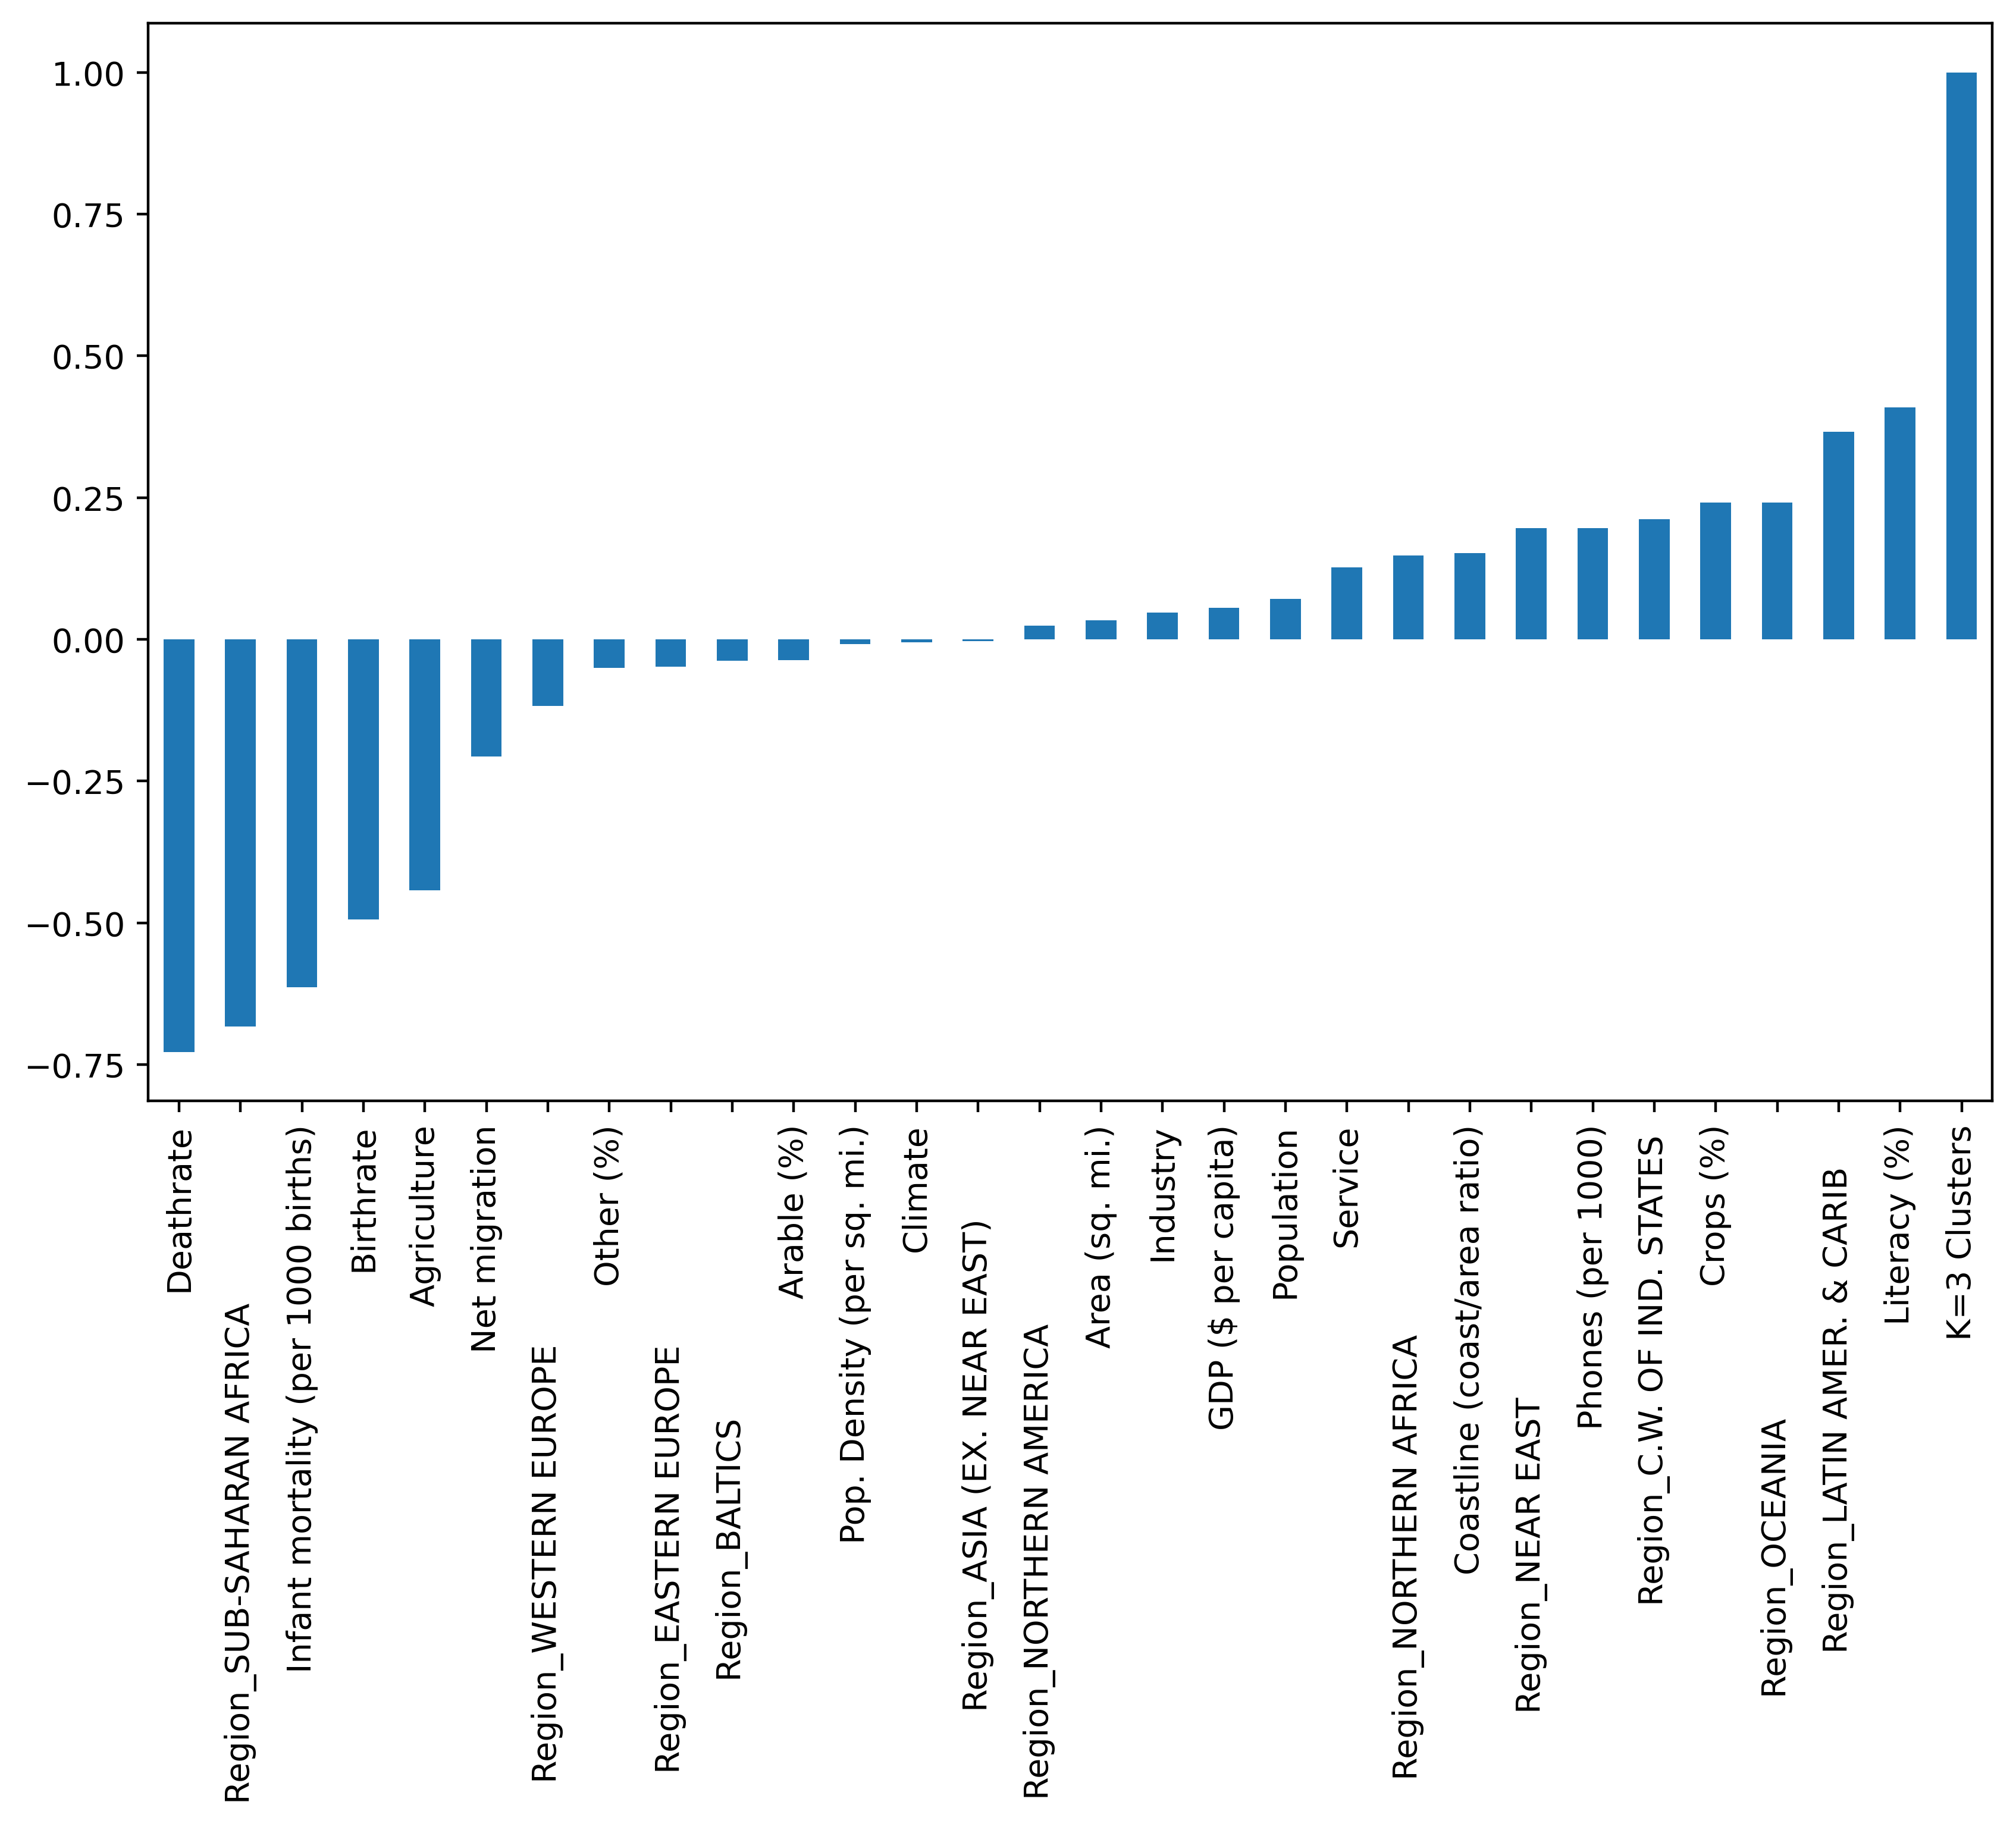

In [66]:
plt.figure(figsize=(10,6),dpi=400)
X.corr()['K=3 Clusters'].sort_values().plot(kind='bar')

---